In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import entropy
import numpy as np 

### Characterization of the database

In [2]:
# Data with only columns of interest
data = pd.read_csv('Data/data.csv', usecols=['tid', 'uid', 'dynamic_opinion', 'url', 'outlet'])

In [3]:
# Head
data.head(n = 5)

,url,outlet,dynamic_opinion,tid,uid
0,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,3123001870860070177,-5290478328161710131
1,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1161354566247419187,1984147057615254567
2,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,-8265852459726288982,907971274336289915
3,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,2424256138563082008,-1315437987437732754
4,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,-8244136094798448801,6507777798650809238


In [4]:
# Number of times that an user share an url
print(f'Number of sharing events = {data.shape[0]}')

Number of sharing events = 1039281


In [5]:
print(f"Number of unique news = {data.drop_duplicates(subset=['url']).shape[0]}")

Number of unique news = 66982


In [6]:
print(f"Number of unique users = {data.drop_duplicates(subset=['uid']).shape[0]}")

Number of unique users = 123180


In [7]:
print(f"Number of unique media outlet = {data.drop_duplicates(subset=['outlet']).shape[0]}")

Number of unique media outlet = 17


In [8]:
print(f"Number of tweets from users labeled as CR = {data[data['dynamic_opinion'] == 'MP'].shape[0]}")

Number of tweets from users labeled as CR = 40277


In [9]:
print(f"Number of users labeled at least one time as CR = {data[data['dynamic_opinion'] == 'MP'].drop_duplicates(subset = ['uid']).shape[0]}")

Number of users labeled at least one time as CR = 15361


In [10]:
print(f"Number of unique news from users labeled as CR = {data[data['dynamic_opinion'] == 'MP'].drop_duplicates(subset = ['url']).shape[0]}")

Number of unique news from users labeled as CR = 10135


In [11]:
print(f"Number of users labeled at least one time as CL = {data[data['dynamic_opinion'] == 'FF'].drop_duplicates(subset = ['uid']).shape[0]}")

Number of users labeled at least one time as CL = 17349


In [12]:
print(f"Number of tweets from users labeled as CL = {data[data['dynamic_opinion'] == 'FF'].shape[0]}")

Number of tweets from users labeled as CL = 65876


In [13]:
print(f"Number of unique news from users labeled as CL = {data[data['dynamic_opinion'] == 'FF'].drop_duplicates(subset = ['url']).shape[0]}")

Number of unique news from users labeled as CL = 19276


### Distribution of the data


#### Distribution of unique news


In [14]:
dist_unique_news = data.drop_duplicates(subset='url').groupby('outlet').count()['url'].sort_values(ascending = False)

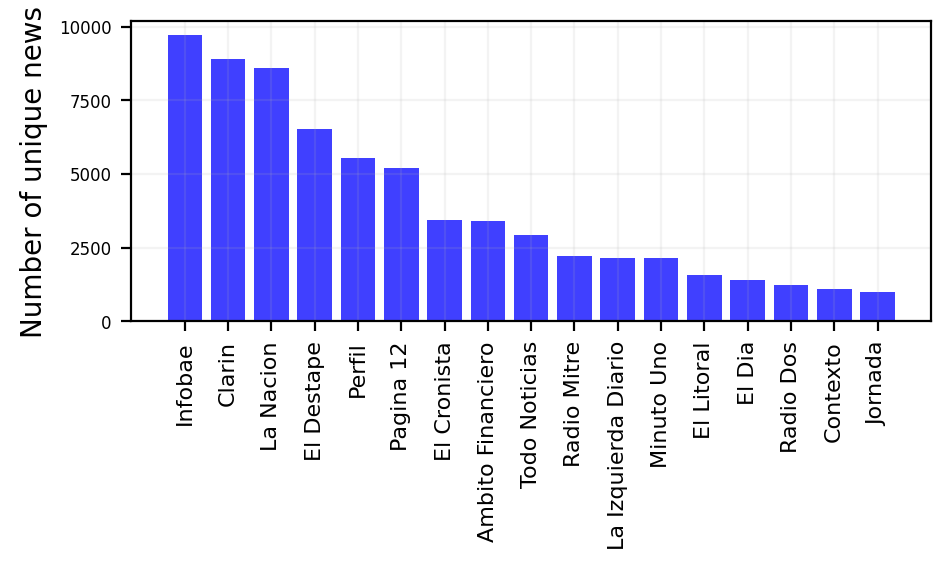

In [15]:
plt.figure(dpi = 200, figsize=(5,3))
plt.axes([0.15, 0.45, 0.80, 0.50])
plt.bar(range(dist_unique_news.shape[0]), dist_unique_news.to_list(), color = 'b', alpha = 0.75)
plt.xticks(range(dist_unique_news.shape[0]), dist_unique_news.index, rotation = 90, size = 8)
plt.yticks(size = 6)
plt.ylabel('Number of unique news', size = 10)
plt.grid(True, alpha = 0.15)
plt.savefig('Results/Distribution_unique_news.pdf')
plt.savefig('Results/Distribution_unique_news.png')
plt.show()

#### Distribution of sharing news


In [16]:
dist_sharing_news = data.groupby('outlet').count()['url'].sort_values(ascending = False)

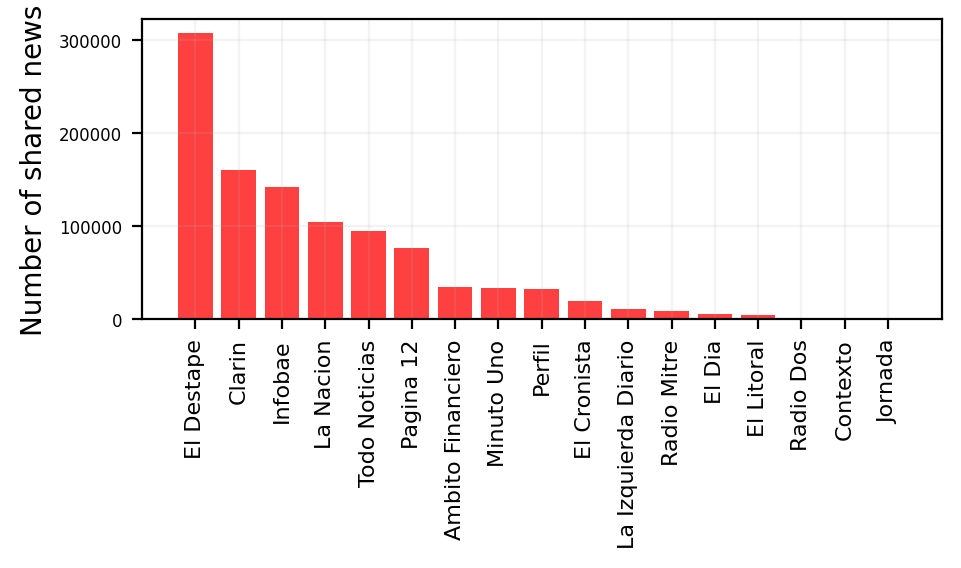

In [17]:
plt.figure(dpi = 200, figsize=(5,3))
plt.axes([0.15, 0.45, 0.80, 0.50])
plt.bar(range(dist_sharing_news.shape[0]), dist_sharing_news.to_list(), color = 'r', alpha = 0.75)
plt.xticks(range(dist_sharing_news.shape[0]), dist_sharing_news.index, rotation = 90, size = 8)
plt.yticks(size = 6)
plt.ylabel('Number of shared news')
plt.savefig('Results/Distribution_sharing_news.pdf')
plt.savefig('Results/Distribution_sharing_news.png')
plt.grid(True, alpha = 0.15)
plt.show()

#### Summarized figure

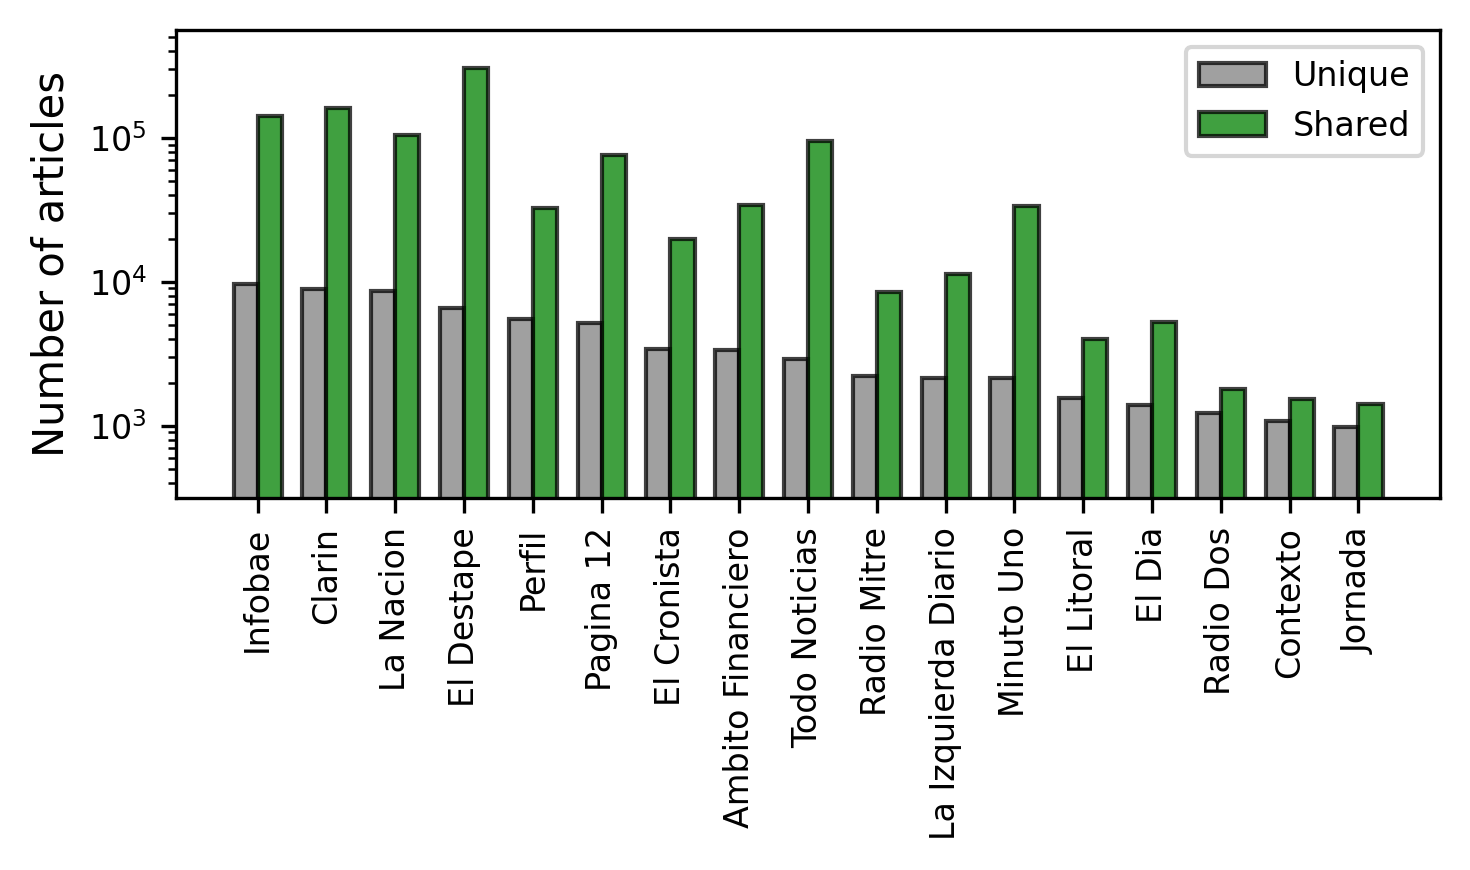

In [18]:
fig, ax1 = plt.subplots(figsize = (5,3), dpi = 300)

width = 0.35
ax1.bar(np.array(range(dist_unique_news.shape[0])) - width, dist_unique_news.to_list(), color = 'gray', edgecolor = 'k', alpha = 0.75,  width = width, align = 'edge', label = 'Unique')
ax1.bar(np.array(range(dist_unique_news.shape[0])), dist_sharing_news[dist_unique_news.index].to_list(), align = 'edge', edgecolor = 'k', color = 'green', alpha = 0.75, width = width, label = 'Shared')
ax1.set_xticks(range(dist_unique_news.shape[0]), dist_unique_news.index, rotation = 90, size = 8)

ax1.set_ylabel('Number of articles', size = 10, color = 'k')
ax1.tick_params(axis='y', labelcolor = 'k', labelsize = 8)
ax1.legend(loc = 'best', fontsize = 8)
ax1.set_yscale('log')
ax1.set_ylim([10**2.5, 10**5.75])
fig.tight_layout()
plt.savefig('Results/Distribution_news.pdf')
plt.savefig('Results/Distribution_news.png')
plt.show()